# Wholesale Customers Analysis: Clustering and Fitting

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [23]:
# Summary statistics
display(df.describe())

# Moments
target_col = 'Grocery'
print(f"Mean: {df[target_col].mean():.2f}")
print(f"Std Dev: {df[target_col].std():.2f}")
print(f"Skewness: {skew(df[target_col]):.2f}")
print(f"Kurtosis: {kurtosis(df[target_col]):.2f}")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Mean: 7951.28
Std Dev: 9503.16
Skewness: 3.58
Kurtosis: 20.66


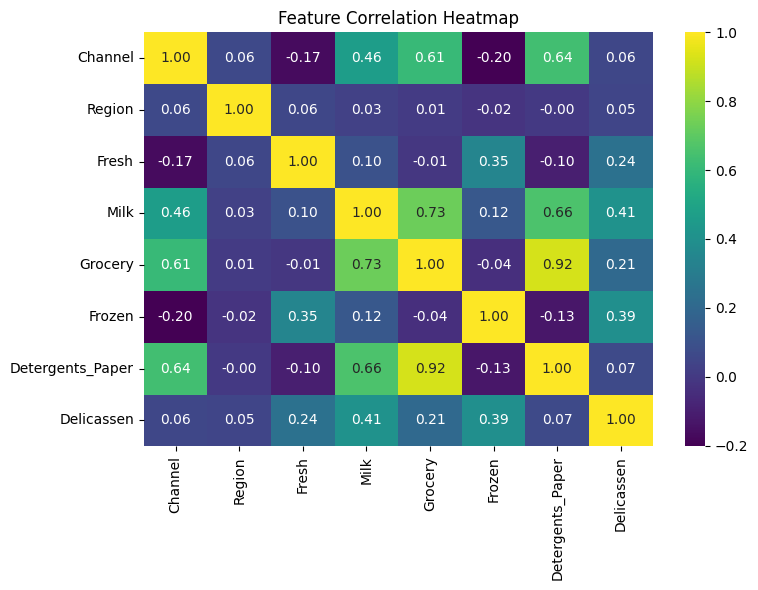

In [24]:
def plot_statistical_plot():
    """Plot a heatmap showing correlations between features."""
    plt.figure(figsize=(8,6))
    sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.savefig('statistical_plot.png')
    plt.show()

plot_statistical_plot()

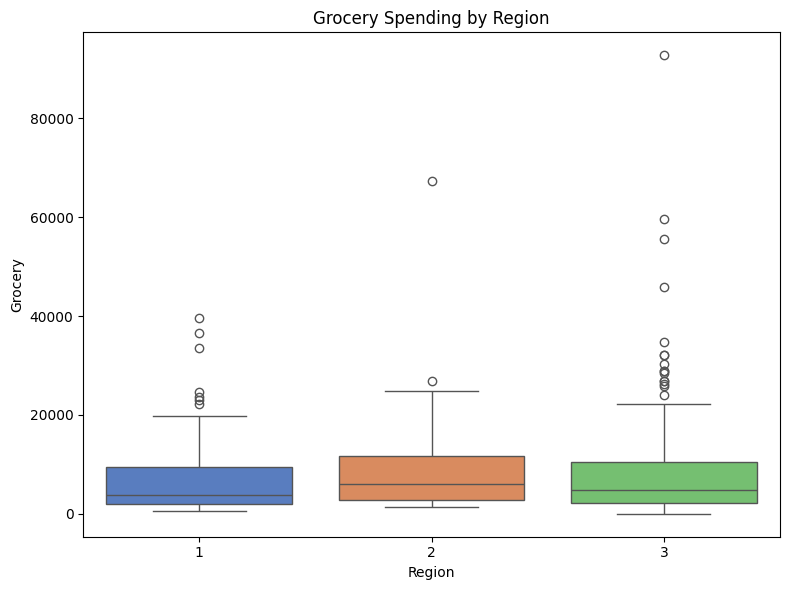

In [25]:
def plot_categorical_plot():
    """Boxplot of Grocery spending by Region."""
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Region', y='Grocery', data=df, palette='muted')
    plt.title('Grocery Spending by Region')
    plt.tight_layout()
    plt.savefig('categorical_plot.png')
    plt.show()

plot_categorical_plot()

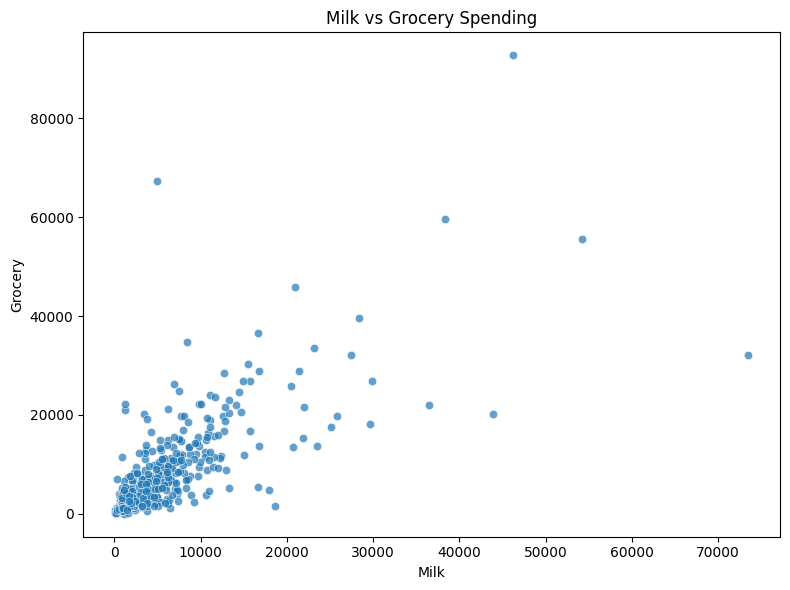

In [26]:
def plot_relational_plot():
    """Scatter plot showing the relationship between Milk and Grocery spending."""
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='Milk', y='Grocery', data=df, alpha=0.7)
    plt.title('Milk vs Grocery Spending')
    plt.tight_layout()
    plt.savefig('relational_plot.png')
    plt.show()

plot_relational_plot()

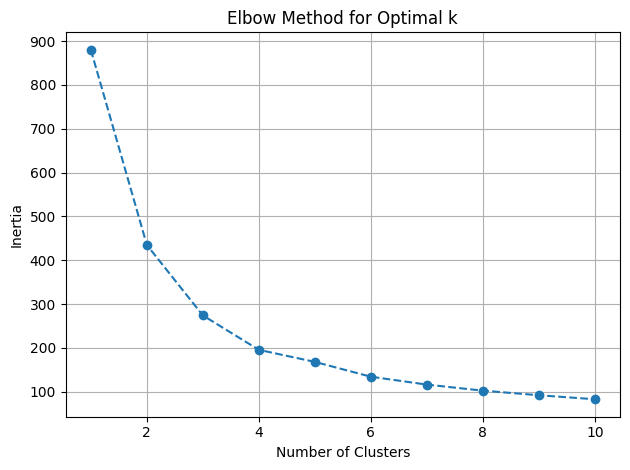

In [27]:
def plot_elbow_plot():
    """Plot elbow graph to find optimal number of clusters."""
    inertia = []
    for k in range(1, 11):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(X_scaled)
        inertia.append(km.inertia_)
    plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('elbow_plot.png')
    plt.show()

plot_elbow_plot()

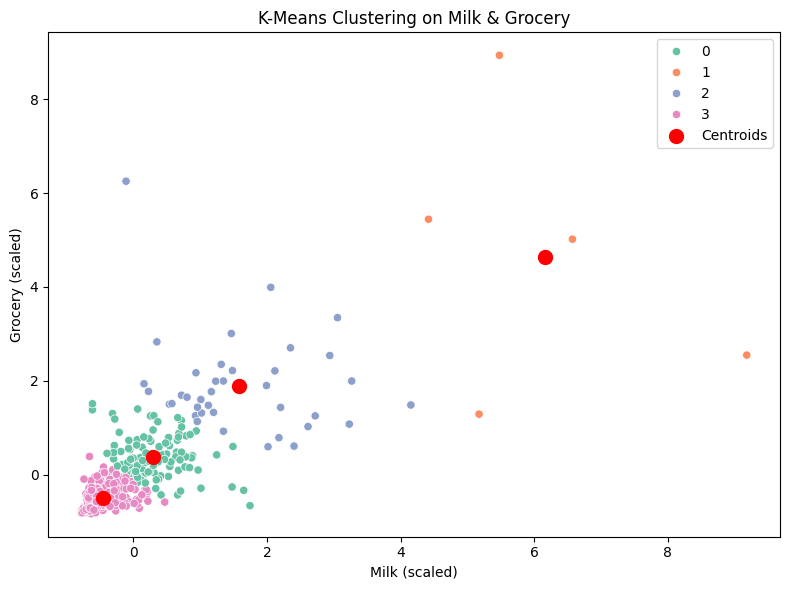

In [28]:
def plot_clustering():
    """Plot K-Means clusters with centroids."""
    kmeans = KMeans(n_clusters=4, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['Cluster'], palette='Set2')
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=100, label='Centroids')
    plt.title('K-Means Clustering on Milk & Grocery')
    plt.xlabel('Milk (scaled)')
    plt.ylabel('Grocery (scaled)')
    plt.legend()
    plt.tight_layout()
    plt.savefig('clustering.png')
    plt.show()

plot_clustering()

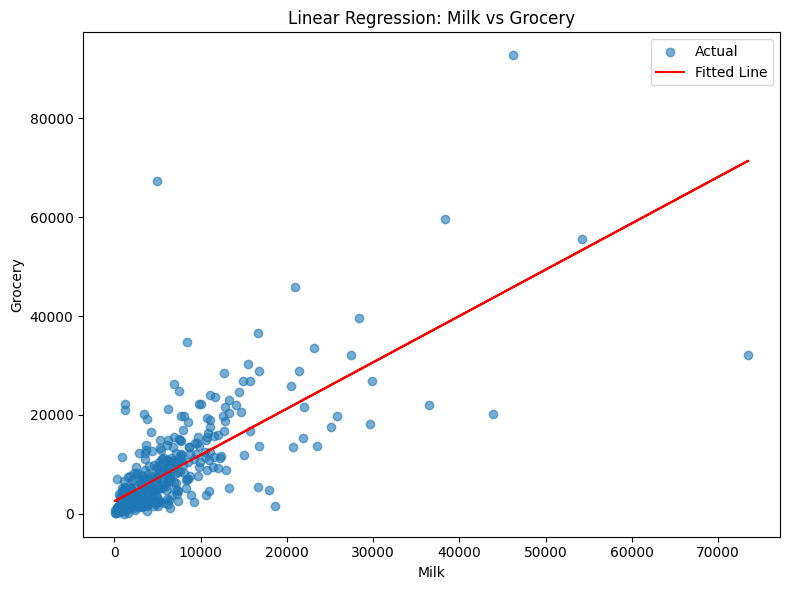

In [29]:
# Linear regression: Predict Grocery from Milk
X = df[['Milk']]
y = df['Grocery']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.6, label='Actual')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.title('Linear Regression: Milk vs Grocery')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.legend()
plt.tight_layout()
plt.savefig('fitting.png')
plt.show()